# Business problem

This project aims to help two hotels — namely Resort Hotel and City Hotel — gain a competitive edge in the hotel industry and maximise their revenue by answering the following business questions: 
* What are the important customer segments?
* Can we predict booking cancellations?
* What are the key features involved in booking cancellations?

The dataset is taken from [Kaggle: Hotel booking demand](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand).

# Import libraries and dataset

In [1]:
# For managing / transforming the data
import numpy as np
import pandas as pd
from google.colab import drive

# For data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# For the ML models
from sklearn import preprocessing, linear_model, ensemble
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import xgboost as xgb

# For deep learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
hotel_data = pd.read_csv('/content/drive/MyDrive/Darius stuff/Data Science Portfolio/Project Hospitality/hotel_bookings.csv')

In [4]:
hotel_data_backup = hotel_data.copy(deep = True)

# Reviewing the data

In [5]:
# To show all the columns of the large dataset
pd.set_option('display.max_columns', None)

In [6]:
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
hotel_data.shape

(119390, 32)

In [8]:
hotel_data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [9]:
# Number of unique inputs for each column 
# To get a sense of the variable type for each column
hotel_data.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [10]:
hotel_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [11]:
# Columns with null values
hotel_null_cols = hotel_data.isnull().sum()
hotel_null_cols[hotel_null_cols > 0]

children         4
country        488
agent        16340
company     112593
dtype: int64

# Basic cleaning

Based on the data review above, it shows that there are null values for certain columns. Since there are only 5 unique input types for `children`, the null values will be replaced with the median value. Whereas for `agent` and `company`, the null values will be replaced with zero and for `country`, the null values will be replaced with 'Unknown'. Additional data cleaning include standardising certain values and dropping rows with no meaningful data.

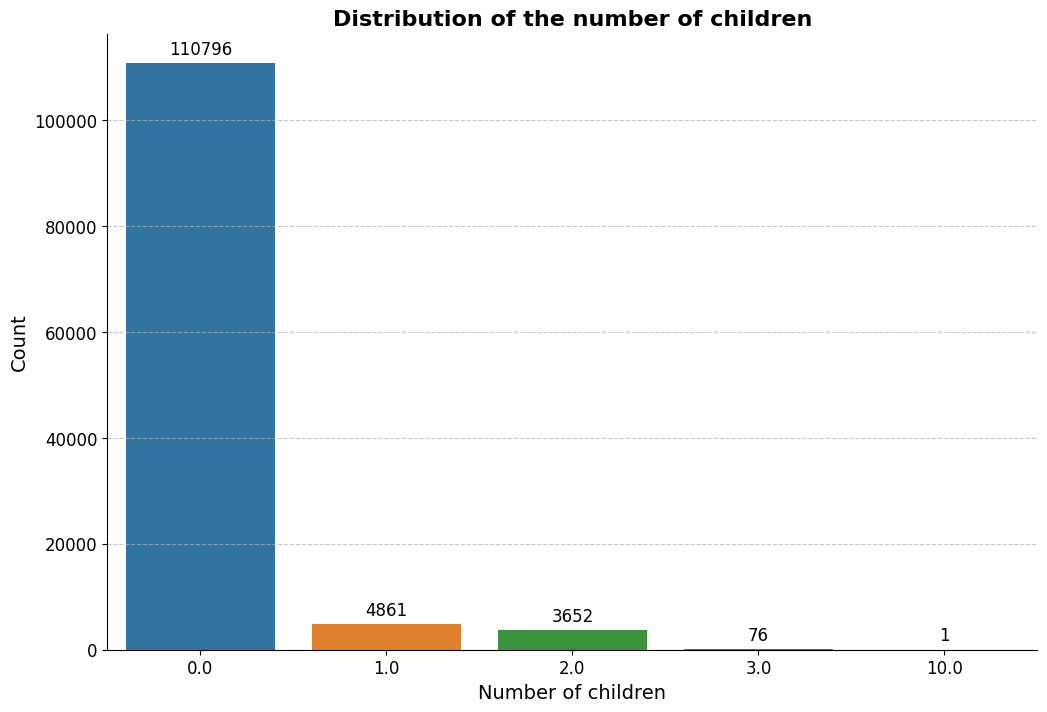

In [12]:
plt.figure(figsize = (12, 8))

# Plot the distribution of the children column
ax = sns.countplot(data = hotel_data, x = 'children')

# Add labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points',
                fontsize = 12)

# Customise the plot
ax.set_xlabel('Number of children', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)
ax.set_title('Distribution of the number of children', fontsize = 16, fontweight = 'bold')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
sns.despine(right = True, top = True)

plt.show()

In [13]:
# Replace the null values
hotel_data['children'].fillna(0.0, inplace = True)
hotel_data['agent'].fillna(0.0, inplace = True)
hotel_data['company'].fillna(0.0, inplace = True)
hotel_data['country'].fillna('Unknown', inplace = True)

# Standardise 'SC' values to 'Undefined' for the meal column
hotel_data['meal'].replace('SC', 'Undefined', inplace = True)

# Drop rows with no guests (i.e., 0 adults, 0 children and 0 babies)
zero_guests = list(hotel_data.loc[hotel_data['adults'] + hotel_data['children'] + hotel_data['babies'] == 0].index)
hotel_data.drop(hotel_data.index[zero_guests], inplace = True)
hotel_data.reset_index(drop = True, inplace = True)

In [14]:
# Review the columns with null values
hotel_null_cols = hotel_data.isnull().sum()
hotel_null_cols[hotel_null_cols > 0]

Series([], dtype: int64)

In [15]:
# Create different datasets for Combined, Resort and City hotels
combined = hotel_data.copy(deep = True)
resort = combined[combined['hotel'] == 'Resort Hotel']
city = combined[combined['hotel'] == 'City Hotel']

# Exploratory data analysis

Before deploying the models, we need to conduct an exploratory data analysis to better understand the data. In this exploration, we'll be considering the following related to the business questions:
* Resort Hotel dataset vs City Hotel dataset
* The distribution of guests' home country
* The number of bookings by market segment
* The number of cancellations by hotel type
* The percentage of cancellations by month and hotel type

## Resort Hotel vs City Hotel

In [16]:
round(len(resort) / len(city), 2)

0.51

Based on the result, it shows that:
* Resort Hotel — accounts for **1/3** of the entire dataset
* City Hotel — accounts for **2/3** of the entire dataset

## Distribution of guests' home country

In [17]:
# Get the number of guests by country
# Note: Only bookings that were not cancelled are included
country_data = pd.DataFrame(combined[combined['is_canceled'] == 0]['country'].value_counts())
country_data.rename(columns = {'country': 'Number of guests'}, inplace = True)

country_data['Country'] = country_data.index
country_data = country_data.loc[:, ['Country', 'Number of guests']].reset_index(drop = True)

In [18]:
# Get the top countries
n_top_countries = 10
top_countries = country_data.nlargest(n_top_countries, 'Number of guests')

# Bucket the remaining countries under 'Others'
other_countries = country_data.loc[~country_data.index.isin(top_countries.index), 'Number of guests'].sum()
other_countries = pd.DataFrame({'Country': ['Others'], 'Number of guests': [other_countries]})

country_data_v2 = pd.concat([top_countries, other_countries]).reset_index(drop = True)

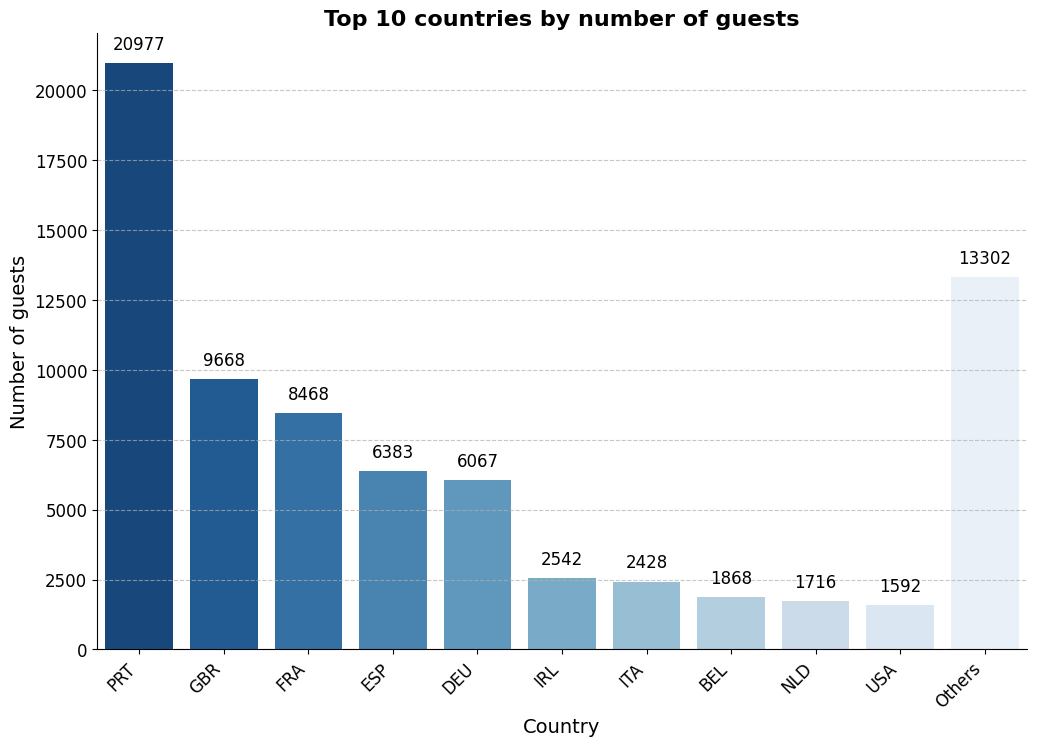

In [19]:
fig, ax = plt.subplots(figsize = (12, 8))

# Plot the number of guests for each country
sns.barplot(x = 'Country', y = 'Number of guests', data = country_data_v2, palette = 'Blues_r')
ax.set_xlabel('Country', fontsize = 14)
ax.set_ylabel('Number of guests', fontsize = 14)
ax.set_title(f'Top {n_top_countries} countries by number of guests', fontsize = 16, fontweight = 'bold')

# Add labels to the bars
for index, row in country_data_v2.iterrows():
    ax.text(index, row['Number of guests'] + 500, row['Number of guests'], ha = 'center', fontsize = 12)

# Customise the plot
plt.xticks(rotation = 45, ha = 'right', fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
sns.despine(right = True, top = True)

plt.show()

The graph above shows that most of the guests come from **Europe**, with the dominant country being *Portugal*. 

## Number of bookings by market segment

In [20]:
# Bookings per market segment
# Note: Only bookings that were not cancelled are included
segments = combined[combined['is_canceled'] == 0]['market_segment'].value_counts()

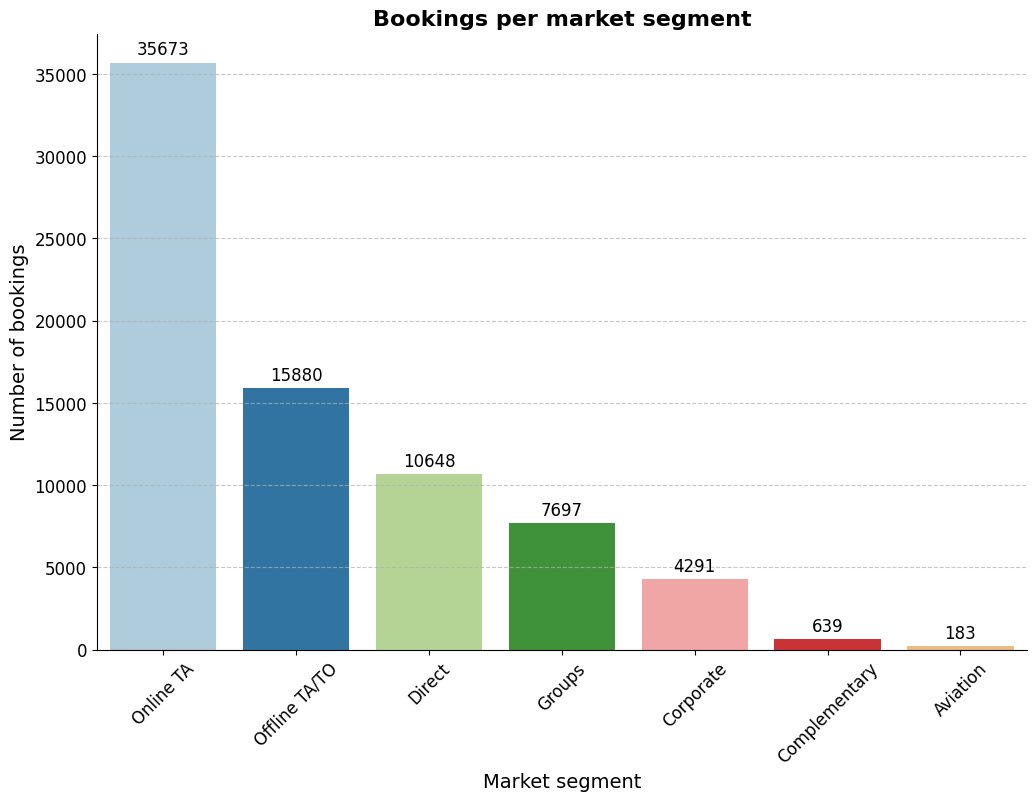

In [21]:
fig, ax = plt.subplots(figsize = (12, 8))

# Plot the distribution by market segment
sns.barplot(x = segments.index, y = segments.values, ax = ax, palette = plt.cm.Paired(range(len(segments))))

# Add labels to the bars
for i, v in enumerate(segments):
    ax.text(i, v + 500, str(v), color = 'black', ha = 'center', fontsize = 12)

# Customize the plot
ax.set_title('Bookings per market segment', fontsize = 16, fontweight = 'bold')
ax.set_xlabel('Market segment', fontsize = 14)
ax.set_ylabel('Number of bookings', fontsize = 14)
ax.tick_params(axis = 'both', labelsize = 12)
plt.xticks(rotation = 45)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
sns.despine(right = True, top = True)

plt.show()

The graph above shows that **Online TA** accounts for most of the hotel bookings.

## Number of cancellations by hotel type

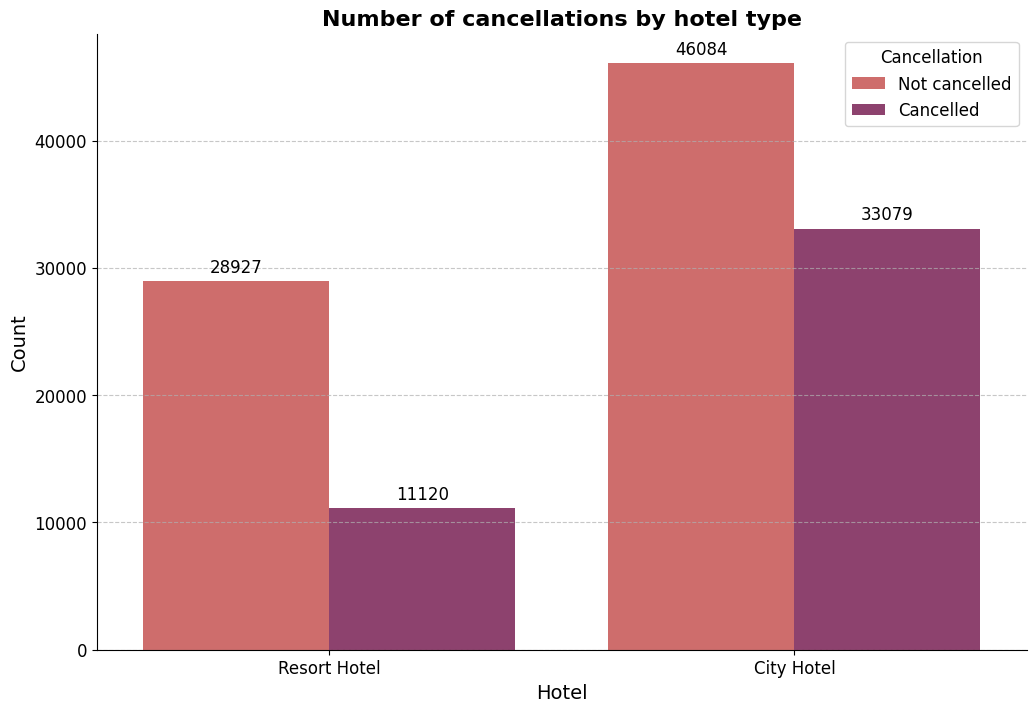

In [22]:
plt.figure(figsize = (12, 8))

# Plot the number of cancellations for each hotel
ax = sns.countplot(data = combined, x = 'hotel', hue = 'is_canceled', palette = 'flare')

# Add labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points',
                fontsize = 12)

# Modify the legend
handles, labels = ax.get_legend_handles_labels()
new_labels = ['Not cancelled', 'Cancelled']
ax.legend(handles, new_labels, title = 'Cancellation', fontsize = 12, title_fontsize = 12)

# Customise the plot
ax.set_xlabel('Hotel', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)
ax.set_title('Number of cancellations by hotel type', fontsize = 16, fontweight = 'bold')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
sns.despine(right = True, top = True)

plt.show()

The graph above shows that **City Hotel accounts for a sizeable portion of booking cancellations**.

## Percentage of cancellations by month and hotel type

In [23]:
# Get the % cancellation for Combined, Resort and City hotels
combined_book_per_month = combined.groupby('arrival_date_month')['hotel'].count()
combined_cancel_per_month = combined.groupby('arrival_date_month')['is_canceled'].sum()

resort_book_per_month = resort.groupby('arrival_date_month')['hotel'].count()
resort_cancel_per_month = resort.groupby('arrival_date_month')['is_canceled'].sum()

city_book_per_month = city.groupby('arrival_date_month')['hotel'].count()
city_cancel_per_month = city.groupby('arrival_date_month')['is_canceled'].sum()

combined_cancel = pd.DataFrame({'Hotel': 'Combined Hotel',
                                'Month': list(resort_book_per_month.index),
                                'Bookings': list(resort_book_per_month.values),
                                'Cancellations': list(resort_cancel_per_month.values)})

resort_cancel = pd.DataFrame({'Hotel': 'Resort Hotel',
                              'Month': list(resort_book_per_month.index),
                              'Bookings': list(resort_book_per_month.values),
                              'Cancellations': list(resort_cancel_per_month.values)})

city_cancel = pd.DataFrame({'Hotel': 'City Hotel',
                            'Month': list(city_book_per_month.index),
                            'Bookings': list(city_book_per_month.values),
                            'Cancellations': list(city_cancel_per_month.values)})

cancel_compile = pd.concat([combined_cancel, resort_cancel, city_cancel], ignore_index = True)
cancel_compile['% cancelled'] = cancel_compile['Cancellations'] / cancel_compile['Bookings'] * 100

# Order by month
ordered_months = ['January', 'February', 'March', 'April', 'May', 'June',
                  'July', 'August', 'September', 'October', 'November', 'December']
cancel_compile['Month'] = pd.Categorical(cancel_compile['Month'], categories = ordered_months, ordered = True)

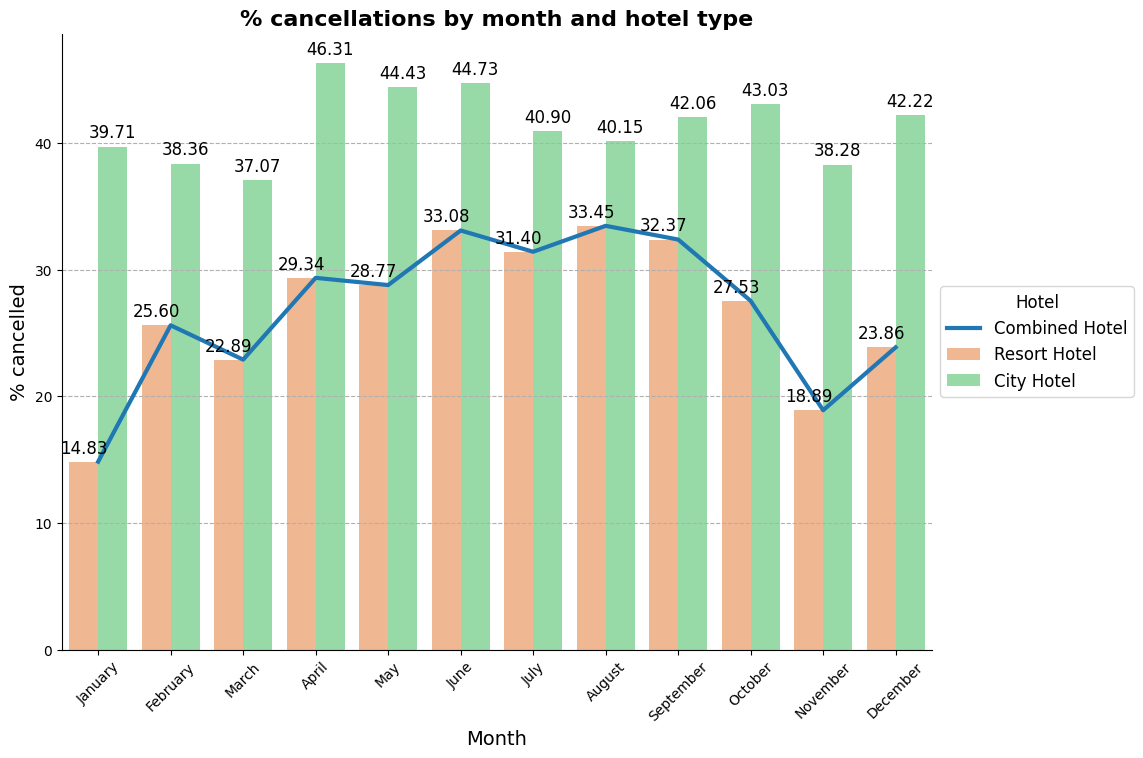

In [24]:
fig, ax = plt.subplots(figsize = (12, 8))
color_palette = sns.color_palette('pastel', n_colors = 4)

# Plot the % cancellation for Combined Hotel using a line plot
sns.lineplot(data = cancel_compile.loc[cancel_compile['Hotel'] == 'Combined Hotel'],
             x = 'Month', y = '% cancelled', ax = ax, linewidth = 3, label = 'Combined Hotel')
ax.set_title('% cancellations by month and hotel type', fontsize = 16, fontweight = 'bold')
ax.set_xlabel('')
ax.set_ylabel('% cancelled', fontsize = 14)
ax.grid(axis = 'y', linestyle = '--')
sns.despine(right = True, top = True, ax = ax)

# Plot the % cancellation for the Resort Hotel and City Hotel using a bar plot
sns.barplot(x = 'Month', y = '% cancelled', hue = 'Hotel',
            hue_order = ['Resort Hotel', 'City Hotel'],
            data = cancel_compile.loc[cancel_compile['Hotel'] != 'Combined Hotel'],
            ax = ax, palette = color_palette[1:])
ax.set_xlabel('Month', fontsize = 14)
ax.set_ylabel('% cancelled', fontsize = 14)
ax.legend(title = 'Hotel', fontsize = 12, title_fontsize = 12, loc = 'center left', bbox_to_anchor = (1, 0.5))

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points',
                fontsize = 12)

plt.xticks(rotation = 45)
plt.subplots_adjust(right = 0.85)

plt.show()

The graph above shows that, in general, there's a peak in booking cancellations in the middle of the year from **June to August**. Looking at each hotel separately, Resort Hotel follows the trend of the Combined Hotel, whereas City Hotel has a cancellation rate of around **40%** throughout the year.

# Data Transformation

Next, we need to conduct data transformation to train our models. The following methods will be applied:
* Categorical features: One-hot encoding
* Numerical features: Z-score standardisation

## Select features

In [25]:
combined['is_canceled'].value_counts()

0    75011
1    44199
Name: is_canceled, dtype: int64

In [26]:
combined['reservation_status'].value_counts()

Check-Out    75011
Canceled     42993
No-Show       1206
Name: reservation_status, dtype: int64

In [27]:
# 4 columns to be excluded:
# - arrival_date_year
# - reservation_status: as it has a strong correlation to is_canceled
# - reservation_status_date
# - country: excluded to make the model more generic

num_features = ['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
                'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies',
                'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled',
                'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'required_car_parking_spaces', 
                'total_of_special_requests', 'adr']

cat_features = ['hotel', 'arrival_date_month', 'meal', 'market_segment',
                'distribution_channel', 'reserved_room_type', 'assigned_room_type',
                'deposit_type', 'customer_type']

all_features = num_features + cat_features
target_var = ['is_canceled']

In [28]:
# Check - 5 includes the 4 excluded columns plus the is_canceled target variable
len(combined.columns) == len(all_features) + len(target_var) + 4

True

## Transform features

### Numerical features

In [29]:
# Apply z-score standardisation
# Combined - For clustering / customer segmentation
combined_transform = combined.copy(deep = True)
combined_transform = combined_transform.loc[:, all_features + target_var]
combined_transform[num_features + target_var] = preprocessing.scale(combined_transform[num_features + target_var])

# Combined - For classification / booking cancellation prediction
x_combined = combined.loc[:, all_features]
x_combined[num_features] = preprocessing.scale(x_combined[num_features])
y_combined = combined.loc[:, target_var]

# Resort 
x_resort = resort.loc[:, all_features]
x_resort[num_features] = preprocessing.scale(x_resort[num_features])
y_resort = resort.loc[:, target_var]

# City 
x_city = city.loc[:, all_features]
x_city[num_features] = preprocessing.scale(x_city[num_features])
y_city = city.loc[:, target_var]

### Categorical features

In [30]:
# For arrival_date_month
months_mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 
                  'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

# Combined
combined_transform.loc[:, 'arrival_date_month'] = combined_transform['arrival_date_month'].replace(months_mapping)
x_combined.loc[:, 'arrival_date_month'] = x_combined['arrival_date_month'].replace(months_mapping)

# Resort
x_resort.loc[:, 'arrival_date_month'] = x_resort['arrival_date_month'].replace(months_mapping)

# City
x_city.loc[:, 'arrival_date_month'] = x_city['arrival_date_month'].replace(months_mapping)

In [31]:
# One-hot encode the remaining categorical features
# For Combined Hotel dataset
cat_features_full = ['hotel', 'meal', 'market_segment', 'distribution_channel', 
                     'reserved_room_type', 'assigned_room_type', 'deposit_type', 
                     'customer_type']

# For Resort and City Hotel datasets (remove hotel column)
cat_features_split = ['meal', 'market_segment', 'distribution_channel', 
                     'reserved_room_type', 'assigned_room_type', 'deposit_type', 
                     'customer_type']

# Combined
combined_transform = pd.get_dummies(combined_transform, columns = cat_features_full)
x_combined = pd.get_dummies(x_combined, columns = cat_features_full)

# Resort
x_resort = x_resort.drop(columns = ['hotel'])
x_resort = pd.get_dummies(x_resort, columns = cat_features_split)

# City
x_city = x_city.drop(columns = ['hotel'])
x_city = pd.get_dummies(x_city, columns = cat_features_split)

**Note**: A few dataframes have been created for the reasons below:
* `combined_transform`: For clustering and determining the important customer segments
* `x_` and `y_`: For developing the classification model and predicting booking cancellations

# Customer segmentation

**K-Means++ clustering** will be used to segment the customers and determine the key features involved in the segmentation.

## Finding the optimal K

In [32]:
# Compute the sum of squared distances for each k value
sse = []
k_range = range(2, 16)

for k in k_range:
    km = KMeans(n_clusters = k, init = 'k-means++', random_state = 2023)
    km.fit(combined_transform)
    sse.append(km.inertia_)

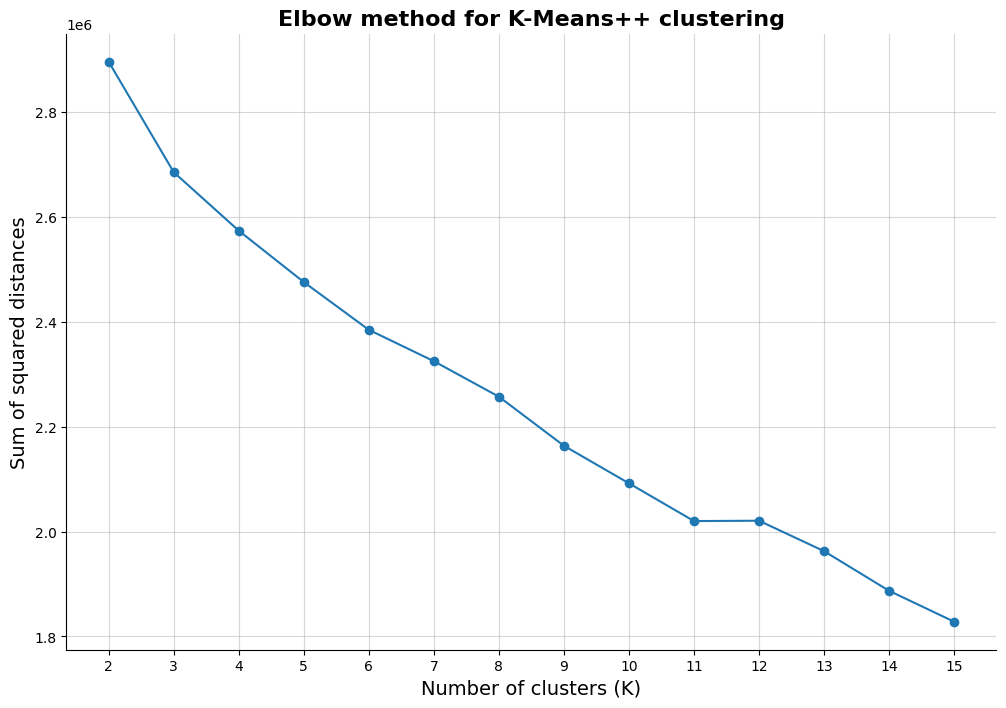

In [33]:
fig, ax = plt.subplots(figsize = (12, 8))

# Plot the sum of squared distances for each k value
ax.plot(k_range, sse, marker = 'o')
ax.set_title('Elbow method for K-Means++ clustering', fontsize = 16, fontweight = 'bold')
ax.set_xlabel('Number of clusters (K)', fontsize = 14)
ax.set_ylabel('Sum of squared distances', fontsize = 14)
ax.set_xticks(k_range)
ax.grid(True, alpha = 0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

The graph above shows that the optimal number of clusters is **11** as there is a slope change from steep to shallow at this point.

## Getting the clusters

In [34]:
k_optimal = 11

# Fit the K-Means++ model with the optimal number of clusters
km = KMeans(n_clusters = k_optimal, init = 'k-means++', random_state = 2023)

# Get the cluster IDs for each data point
clusters = km.fit_predict(combined_transform)

# Add cluster IDs to the transformed Combined Hotel dataset
combined_clusters = combined_transform.copy(deep = True)
combined_clusters['cluster_id'] = clusters

In [35]:
print(combined_clusters['cluster_id'].value_counts())

4     25847
9     22849
3     20390
7     20070
2     12102
1      8731
0      4494
5      2900
6       917
10      765
8       145
Name: cluster_id, dtype: int64


## Visualising the clusters

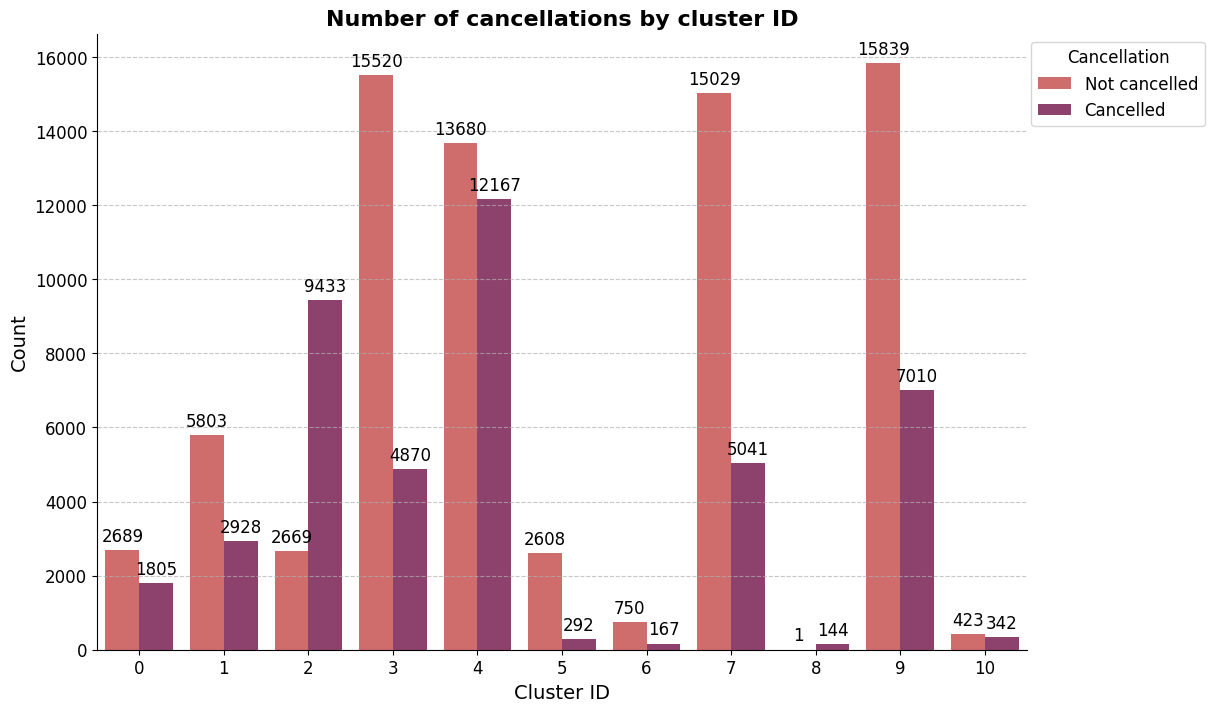

In [36]:
plt.figure(figsize = (12, 8))

# Plot the number of cancellations for each cluster ID
ax = sns.countplot(data = combined_clusters, x = 'cluster_id', hue = 'is_canceled', palette = 'flare')

# Add labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points',
                fontsize = 12)

# Modify the legend
handles, labels = ax.get_legend_handles_labels()
new_labels = ['Not cancelled', 'Cancelled']
ax.legend(handles, new_labels, loc = 'upper right', bbox_to_anchor = (1.2, 1), 
          title = 'Cancellation', fontsize = 12, title_fontsize = 12)

# Customise the plot
ax.set_xlabel('Cluster ID', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)
ax.set_title('Number of cancellations by cluster ID', fontsize = 16, fontweight = 'bold')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
sns.despine(right = True, top = True)

plt.show()

The graph above shows that **cluster 2** has a significant number of hotel booking cancellations, with the number of cancellations outweighing the number of non-cancellations.

## Key clustering features

In [37]:
# Create a dataframe of the centroids for each cluster
cluster_centroids = pd.DataFrame(km.cluster_centers_, columns = combined_transform.columns)

In [38]:
# Find the range of average feature values across all clusters
feature_range = cluster_centroids.max() - cluster_centroids.min()

# Get the top feature range
top_feature_range = feature_range.sort_values(ascending = False)[:10]

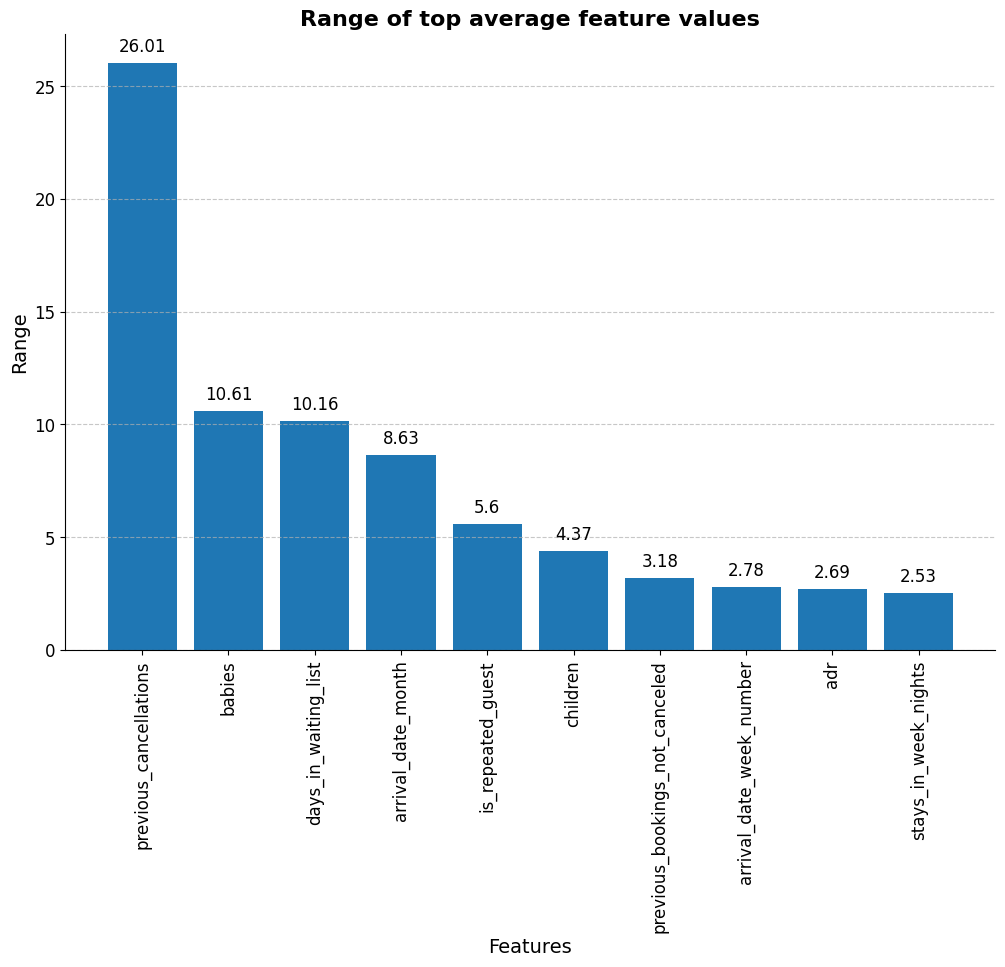

In [39]:
# Plot the range of average feature values
fig, ax = plt.subplots(figsize = (12, 8))

ax.bar(top_feature_range.index, top_feature_range.values)
ax.set_title('Range of top average feature values', fontsize = 16, fontweight = 'bold')
ax.set_xlabel('Features', fontsize = 14)
ax.set_ylabel('Range', fontsize = 14)
ax.set_xticklabels(top_feature_range.index, rotation = 90, fontsize = 12)
ax.tick_params(axis = 'both', labelsize = 12)
ax.grid(axis = 'y', linestyle = '--', alpha = 0.7)
sns.despine(top = True, right = True)

# Add value labels to the bars
for i, v in enumerate(top_feature_range.values):
    ax.text(i, v + 0.5, str(round(v, 2)), ha = 'center', fontsize = 12)

plt.show()

In this cluster feature analysis, the top features were derived based on the min-max range of the average feature values of all the cluster centroids. Features with a larger difference in average value between clusters are likely to have a greater impact on clustering.

The graph above shows that the number of `previous_cancellations` is a prominent feature for clustering the Combined Hotel dataset.

# Cancellation prediction

To determine the optimal model for predicting booking cancellations, six different models will be tested, namely:
* Logistic regression
* AdaBoost, with logistic regression as the base model
* Decision tree
* Random forest
* XGBoost
* Neural network

The evaluation metrics include the following:
* Accuracy
* Precision
* Recall
* F1 score
* AUC 

Stratified k-fold (with shuffle) cross-validation will be employed to obtain better accuracy on the metrics scores. The aim is to find the predictive model that performs well across the different metrics. Furthermore, the models will be run on the Combined, Resort and City Hotel datasets to determine whether there are any significant differences in the metric scores.

In [40]:
x_compile = [x_combined, x_resort, x_city]
y_compile = [y_combined, y_resort, y_city]

hotel_names = ['Combined', 'Resort', 'City']

In [41]:
# Split data into kfolds for cross validation (with shuffle)
num_folds = 5
skf = StratifiedKFold(n_splits = num_folds, shuffle = True, random_state = 2023)

In [42]:
# Define evaluation metrics for cross validation
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1': make_scorer(f1_score),
           'auc': make_scorer(roc_auc_score)}

## Logistic regression

### Basic

In [43]:
log_regr = linear_model.LogisticRegression(solver = 'lbfgs', max_iter = 10000, random_state = 2023)

In [44]:
log_regr_scores = {
    'Hotel': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'AUC': []
}

# Logistic regression for each hotel type
for i in range(len(x_compile)):
    
    # Perform cross-validation and calculate evaluation metrics
    cv_results = cross_validate(log_regr, x_compile[i], y_compile[i], cv = skf, scoring = scoring)

    # Save average evaluation metrics across all folds
    log_regr_scores['Hotel'].append(hotel_names[i])
    log_regr_scores['Accuracy'].append(round(np.mean(cv_results['test_accuracy']), 2))
    log_regr_scores['Precision'].append(round(np.mean(cv_results['test_precision']), 2))
    log_regr_scores['Recall'].append(round(np.mean(cv_results['test_recall']), 2))
    log_regr_scores['F1-score'].append(round(np.mean(cv_results['test_f1']), 2))
    log_regr_scores['AUC'].append(round(np.mean(cv_results['test_auc']), 2))

In [45]:
df_log_regr_scores = pd.DataFrame(log_regr_scores).set_index('Hotel')

### With AdaBoost

In [46]:
ada_log_regr = ensemble.AdaBoostClassifier(base_estimator = log_regr, random_state = 2023)

In [47]:
ada_scores = {
    'Hotel': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'AUC': []
}

# AdaBoost for each hotel type
for i in range(len(x_compile)):

    # Perform cross-validation and calculate evaluation metrics
    cv_results = cross_validate(ada_log_regr, x_compile[i], y_compile[i], cv = skf, scoring = scoring)

    # Save average evaluation metrics across all folds
    ada_scores['Hotel'].append(hotel_names[i])
    ada_scores['Accuracy'].append(round(np.mean(cv_results['test_accuracy']), 2))
    ada_scores['Precision'].append(round(np.mean(cv_results['test_precision']), 2))
    ada_scores['Recall'].append(round(np.mean(cv_results['test_recall']), 2))
    ada_scores['F1-score'].append(round(np.mean(cv_results['test_f1']), 2))
    ada_scores['AUC'].append(round(np.mean(cv_results['test_auc']), 2))

In [48]:
df_ada_scores = pd.DataFrame(ada_scores).set_index('Hotel')

## Decision tree

In [49]:
decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 2023)

In [50]:
decision_tree_scores = {
    'Hotel': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'AUC': []
}

for i in range(len(x_compile)):

    # Perform cross-validation and calculate evaluation metrics
    cv_results = cross_validate(decision_tree, x_compile[i], y_compile[i], cv = skf, scoring = scoring)

    # Save average evaluation metrics across all folds
    decision_tree_scores['Hotel'].append(hotel_names[i])
    decision_tree_scores['Accuracy'].append(round(np.mean(cv_results['test_accuracy']), 2))
    decision_tree_scores['Precision'].append(round(np.mean(cv_results['test_precision']), 2))
    decision_tree_scores['Recall'].append(round(np.mean(cv_results['test_recall']), 2))
    decision_tree_scores['F1-score'].append(round(np.mean(cv_results['test_f1']), 2))
    decision_tree_scores['AUC'].append(round(np.mean(cv_results['test_auc']), 2))

In [51]:
df_decision_tree_scores = pd.DataFrame(decision_tree_scores).set_index('Hotel')

## Random forest

In [52]:
random_forest = RandomForestClassifier(n_estimators = 10, criterion='entropy', random_state = 2023)

In [53]:
random_forest_scores = {
    'Hotel': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'AUC': []
}

for i in range(len(x_compile)):

    # Perform cross-validation and calculate evaluation metrics
    cv_results = cross_validate(random_forest, x_compile[i], y_compile[i], cv = skf, scoring = scoring)

    # Save average evaluation metrics across all folds
    random_forest_scores['Hotel'].append(hotel_names[i])
    random_forest_scores['Accuracy'].append(round(np.mean(cv_results['test_accuracy']), 2))
    random_forest_scores['Precision'].append(round(np.mean(cv_results['test_precision']), 2))
    random_forest_scores['Recall'].append(round(np.mean(cv_results['test_recall']), 2))
    random_forest_scores['F1-score'].append(round(np.mean(cv_results['test_f1']), 2))
    random_forest_scores['AUC'].append(round(np.mean(cv_results['test_auc']), 2))

In [54]:
df_random_forest_scores = pd.DataFrame(random_forest_scores).set_index('Hotel')

## XGBoost

In [55]:
xgb_model = xgb.XGBClassifier(random_state = 2023)

In [56]:
xgb_scores = {
    'Hotel': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'AUC': []
}

for i in range(len(x_compile)):

    # Perform cross-validation and calculate evaluation metrics
    cv_results = cross_validate(xgb_model, x_compile[i], y_compile[i], cv = skf, scoring = scoring)

    # Save average evaluation metrics across all folds
    xgb_scores['Hotel'].append(hotel_names[i])
    xgb_scores['Accuracy'].append(round(np.mean(cv_results['test_accuracy']), 2))
    xgb_scores['Precision'].append(round(np.mean(cv_results['test_precision']), 2))
    xgb_scores['Recall'].append(round(np.mean(cv_results['test_recall']), 2))
    xgb_scores['F1-score'].append(round(np.mean(cv_results['test_f1']), 2))
    xgb_scores['AUC'].append(round(np.mean(cv_results['test_auc']), 2))

In [57]:
df_xgb_scores = pd.DataFrame(xgb_scores).set_index('Hotel')

## Neural network

In [58]:
# Create a function to define the neural network architecture
def create_nn(input_shape):
    model = Sequential([
        Dense(32, activation = 'relu', input_dim = input_shape),
        Dense(64, activation = 'relu'),
        Dense(256, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(48, activation = 'relu'),
        Dropout(0.1),
        Dense(12, activation = 'relu'),
        Dense(1, activation = 'sigmoid')
    ])
    
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

In [59]:
nn_scores = {
    'Hotel': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'AUC': []
}

for i in range(len(x_compile)):
    
    # Wrap the neural network function in a KerasClassifier
    nn = KerasClassifier(build_fn = create_nn, input_shape = x_compile[i].shape[1], epochs = 25, batch_size = 32, verbose = 0)
    
    # Perform cross-validation and calculate evaluation metrics
    cv_results = cross_validate(nn, x_compile[i], y_compile[i], cv = skf, scoring = scoring)
    
    # Save average evaluation metrics across all folds
    nn_scores['Hotel'].append(hotel_names[i])
    nn_scores['Accuracy'].append(round(np.mean(cv_results['test_accuracy']), 2))
    nn_scores['Precision'].append(round(np.mean(cv_results['test_precision']), 2))
    nn_scores['Recall'].append(round(np.mean(cv_results['test_recall']), 2))
    nn_scores['F1-score'].append(round(np.mean(cv_results['test_f1']), 2))
    nn_scores['AUC'].append(round(np.mean(cv_results['test_auc']), 2))

495/495 [==============================] - 1s 1ms/step


In [60]:
df_nn_scores = pd.DataFrame(nn_scores).set_index('Hotel')

## Model evaluation

In [61]:
scores_compile = [df_log_regr_scores, df_ada_scores, df_decision_tree_scores, 
                  df_random_forest_scores, df_xgb_scores, df_nn_scores]

model_names = ['Logistic Regression', 'AdaBoost', 'Decision Tree', 
              'Random Forest', 'XGBoost', 'Neural Network']

In [62]:
for i in range(len(scores_compile)):
    print('-' * 40)
    print('Evaluation report for ' + model_names[i] + ':')
    print(scores_compile[i])

----------------------------------------
Evaluation report for Logistic Regression:
          Accuracy  Precision  Recall  F1-score   AUC
Hotel                                                
Combined      0.81       0.83    0.62      0.71  0.77
Resort        0.82       0.75    0.54      0.63  0.74
City          0.81       0.85    0.66      0.74  0.79
----------------------------------------
Evaluation report for AdaBoost:
          Accuracy  Precision  Recall  F1-score   AUC
Hotel                                                
Combined      0.80       0.81    0.59      0.68  0.75
Resort        0.81       0.76    0.48      0.59  0.71
City          0.80       0.83    0.64      0.72  0.77
----------------------------------------
Evaluation report for Decision Tree:
          Accuracy  Precision  Recall  F1-score   AUC
Hotel                                                
Combined      0.83       0.77    0.78      0.78  0.82
Resort        0.83       0.69    0.71      0.70  0.79
City     

The metric scores across the three hotel categories — Combined, Resort and City hotels — show little discrepancies in the scores. As such, the metric scores from the **Combined Hotel** dataset will be used to determine the optimal prediction model.

In [63]:
combined_scores_compile = [df_log_regr_scores.loc['Combined'],
                           df_ada_scores.loc['Combined'],
                           df_decision_tree_scores.loc['Combined'],
                           df_random_forest_scores.loc['Combined'],
                           df_xgb_scores.loc['Combined'],
                           df_nn_scores.loc['Combined']]

In [64]:
combined_scores = pd.concat(combined_scores_compile, axis = 1)
combined_scores.columns = model_names

In [65]:
combined_scores

,Logistic Regression,AdaBoost,Decision Tree,Random Forest,XGBoost,Neural Network
Accuracy,0.81,0.80,0.83,0.86,0.85,0.84
Precision,0.83,0.81,0.77,0.87,0.86,0.82
Recall,0.62,0.59,0.78,0.75,0.72,0.73
F1-score,0.71,0.68,0.78,0.80,0.79,0.77
AUC,0.77,0.75,0.82,0.84,0.83,0.82


From the report above, it shows that **random forest** performs best among all the models across the various evaluation metrics. Hence, we will use the random forest model trained with the Combined Hotel dataset and explore the relationships between the features and the `is_canceled` target variable.

## Evaluating the features

In [66]:
random_forest.fit(x_compile[0], y_compile[0])
    
# Get the feature importances
importances = random_forest.feature_importances_
    
# Sort the importances in descending order
indices = np.argsort(importances)[::-1]
    
# Print the top features for the Combined Hotel dataset
print('Feature ranking for ' + hotel_names[0] + ' Hotel:')
for f in range(10):
    print('%d. %s (%f)' % (f + 1, x_compile[0].columns[indices[f]], importances[indices[f]]))

Feature ranking for Combined Hotel:
1. lead_time (0.137667)
2. adr (0.095236)
3. deposit_type_Non Refund (0.091115)
4. arrival_date_day_of_month (0.073279)
5. deposit_type_No Deposit (0.068556)
6. arrival_date_week_number (0.064302)
7. total_of_special_requests (0.049492)
8. stays_in_week_nights (0.044184)
9. agent (0.043070)
10. arrival_date_month (0.038528)


The top three features of random forest model are:
* `lead_time`
* `adr`
* `deposit_type`

### Lead time

In [67]:
# Group the hotel dataset by lead time and calculate the summary statistics
lead_cancel_data = hotel_data.groupby('lead_time')['is_canceled'].describe()

In [68]:
lead_cancel_data

,count,mean,std,min,25%,50%,75%,max
lead_time,,,,,,,,
0,6264.0,0.066571,0.249297,0.0,0.0,0.0,0.0,1.0
1,3445.0,0.092308,0.289502,0.0,0.0,0.0,0.0,1.0
2,2065.0,0.103148,0.304225,0.0,0.0,0.0,0.0,1.0
3,1815.0,0.100275,0.300450,0.0,0.0,0.0,0.0,1.0
4,1710.0,0.102339,0.303182,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
622,17.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
626,30.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
629,17.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [69]:
# Use lead_times wih more than 10 bookings for graph
lead_cancel_data_10 = lead_cancel_data.loc[lead_cancel_data['count'] >= 10]

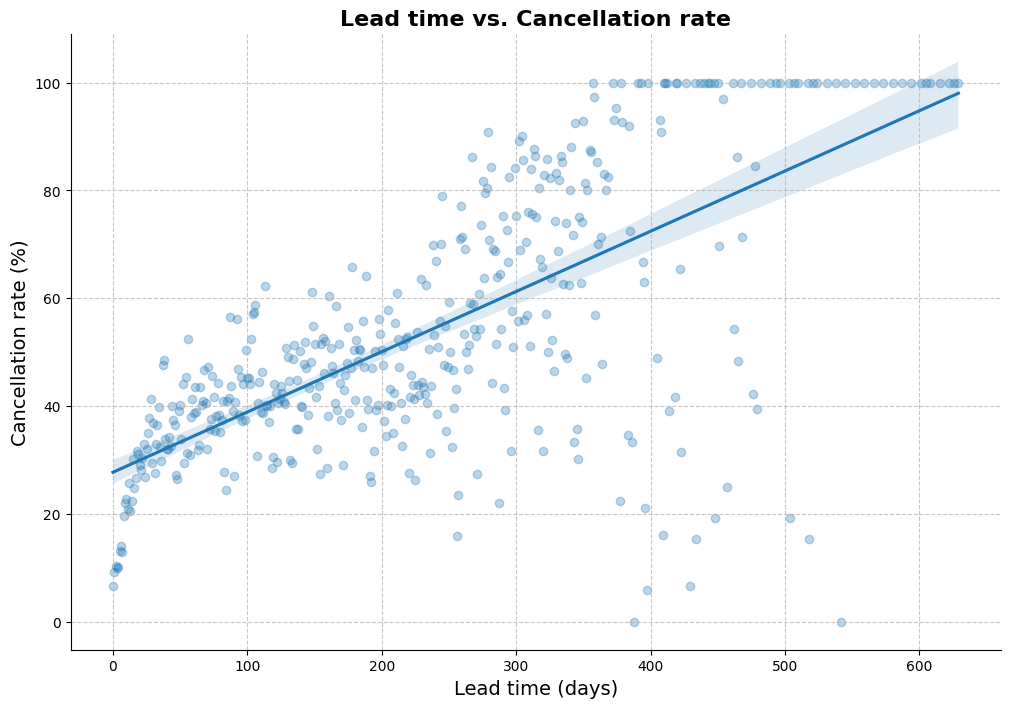

In [70]:
plt.figure(figsize = (12, 8))

# Plot lead time vs. cancellation rate
sns.regplot(x = lead_cancel_data_10.index, y = lead_cancel_data_10['mean'].values * 100, scatter_kws = {'alpha': 0.3}, color = 'tab:blue')

plt.title('Lead time vs. Cancellation rate', fontsize = 16, fontweight = 'bold')
plt.xlabel('Lead time (days)', fontsize = 14)
plt.ylabel('Cancellation rate (%)', fontsize = 14)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(axis = 'both', linestyle = '--', alpha = 0.7)
sns.despine(right = True, top = True)

plt.show()

The graph above shows that as hotel bookings are made further in advance, the cancellation rate increases.

### ADR

In [71]:
# Group the hotel dataset by adr and calculate the summary statistics
adr_cancel_data = hotel_data.groupby('adr')['is_canceled'].describe()

In [72]:
adr_cancel_data

,count,mean,std,min,25%,50%,75%,max
adr,,,,,,,,
-6.38,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
0.00,1810.0,0.103867,0.305173,0.0,0.0,0.0,0.0,1.0
0.26,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
0.50,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
1.00,14.0,0.214286,0.425815,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
450.00,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
451.50,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
508.00,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0


In [73]:
# Removing the outlier (i.e., adr = 5400)
adr_cancel_data_v2 = adr_cancel_data.loc[adr_cancel_data.index < 5400]

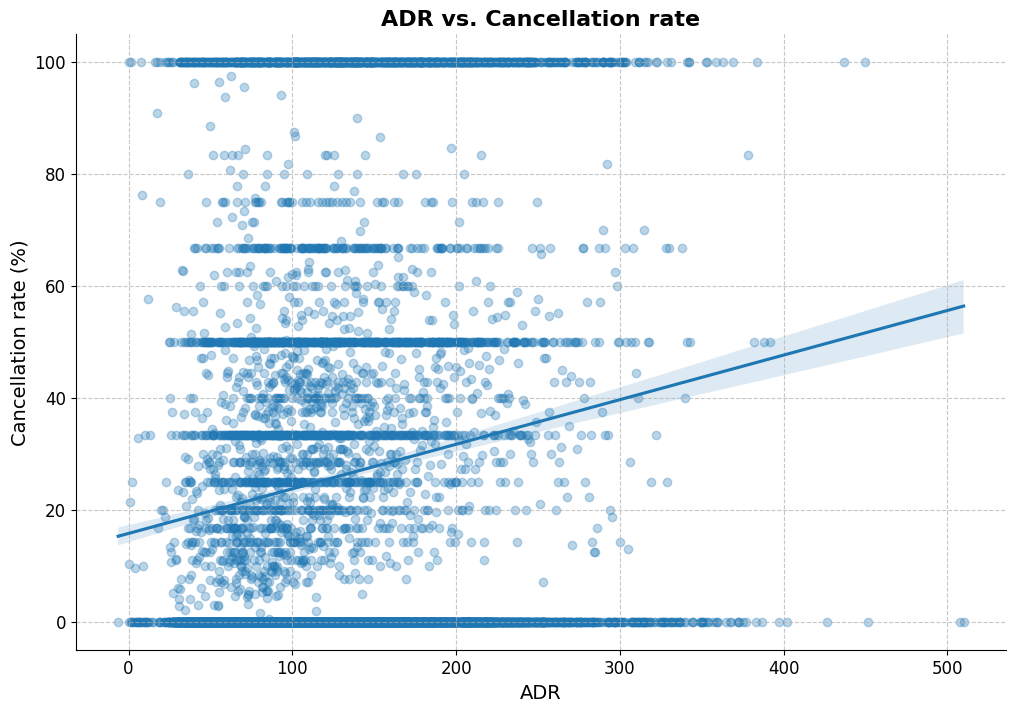

In [74]:
plt.figure(figsize = (12, 8))

# Plot adr vs. cancellation rate
sns.regplot(x = adr_cancel_data_v2.index, y = adr_cancel_data_v2['mean'].values * 100, scatter_kws = {'alpha': 0.3}, color = 'tab:blue')

plt.title('ADR vs. Cancellation rate', fontsize = 16, fontweight = 'bold')
plt.xlabel('ADR', fontsize = 14)
plt.ylabel('Cancellation rate (%)', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid(axis = 'both', linestyle = '--', alpha = 0.7)
sns.despine(right = True, top = True)

plt.show()

The graph above illustrates that as adr increases, the cancellation rate also increases.

### Deposit type

In [75]:
# Group the hotel dataset by deposit type and calculate the summary statistics
deposit_cancel_data = hotel_data.groupby('deposit_type')['is_canceled'].describe()

In [76]:
deposit_cancel_data

,count,mean,std,min,25%,50%,75%,max
deposit_type,,,,,,,,
No Deposit,104461.0,0.284020,0.450948,0.0,0.0,0.0,1.0,1.0
Non Refund,14587.0,0.993624,0.079595,0.0,1.0,1.0,1.0,1.0
Refundable,162.0,0.222222,0.417029,0.0,0.0,0.0,0.0,1.0


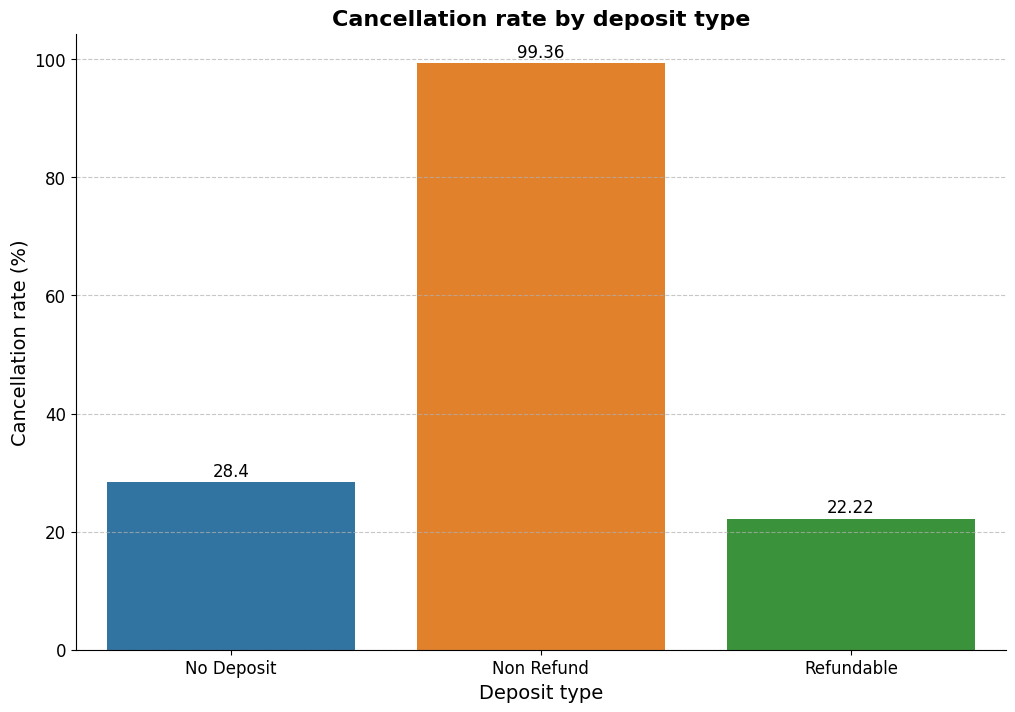

In [77]:
plt.figure(figsize = (12, 8))

# Plot deposit type vs. cancellation rate
sns.barplot(x = deposit_cancel_data.index, y = deposit_cancel_data['mean'].values * 100)

# Add value labels to the bars
for i, value in enumerate(deposit_cancel_data['mean'].values * 100):
    plt.text(i, value + 1, str(round(value, 2)), ha = 'center', fontsize = 12)

# Customise the plot
plt.title('Cancellation rate by deposit type', fontsize = 16, fontweight = 'bold')
plt.xlabel('Deposit type', fontsize = 14)
plt.ylabel('Cancellation rate (%)', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
sns.despine()

plt.show()

The graph above shows that non-refund deposit type has the highest cancellation rate, which is counter-intuitive. As such, further investigation is required to assess the reason.

In [78]:
deposit_mean_data = hotel_data.groupby('deposit_type').mean()

In [79]:
deposit_mean_data

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
deposit_type,,,,,,,,,,,,,,,,,,,,
No Deposit,0.284020,88.841951,2016.173950,27.133208,15.815223,0.969615,2.555633,1.865806,0.118599,0.009085,0.035295,0.042044,0.154938,0.247030,78.745503,11.175874,1.518040,103.685436,0.071184,0.651726
Non Refund,0.993624,212.908891,2016.031466,27.448619,15.595462,0.621718,2.091109,1.811407,0.000617,0.000000,0.004387,0.411462,0.010626,0.012477,47.480016,6.215809,7.992253,89.964017,0.000069,0.001782
Refundable,0.222222,152.098765,2016.141975,20.932099,23.456790,0.975309,2.851852,1.907407,0.030864,0.000000,0.024691,0.000000,0.018519,0.592593,56.185185,133.666667,9.586420,76.209753,0.123457,0.141975


Looking at the mean values, it shows that non-refund deposit type has the highest average lead time. Since lead time is correlated to cancellation rate, this could be the reason why non-refund deposit type has the highest cancellation rate.

**Business proposition**: Since lead time and adr are correlated to cancellation rate, more marketing campaigns can be targeted towards people who have made advance hotel bookings and/or greater lodging payments to retain their booking interest.

# Cancellation prediction on clusters

To combine the customer segmentation and cancellation prediction sections, the random forest model will be run on selected clusters to determine whether there is any significant improvement in the evaluation metric scores. In this case, **cluster 4** has been chosen given that it has the largest cluster dataset.

In [80]:
cluster4 = combined_clusters.copy(deep = True)
cluster4['is_canceled'] = y_combined
cluster4 = cluster4[cluster4['cluster_id'] == 4]
cluster4.drop(columns = ['cluster_id'], inplace = True)
cluster4.reset_index(drop = True, inplace = True)

In [81]:
x_cluster4 = cluster4.drop(columns = ['is_canceled'])
y_cluster4 = cluster4.loc[:, 'is_canceled']

In [82]:
# Perform cross-validation and calculate evaluation metrics
cluster4_random_forest_cv = cross_validate(random_forest, x_cluster4, y_cluster4, cv = skf, scoring = scoring)

# Print average evaluation metrics across all folds
print('Evaluation report for cluster 4:')
print('Accuracy:', round(np.mean(cluster4_random_forest_cv['test_accuracy']), 2))
print('Precision:', round(np.mean(cluster4_random_forest_cv['test_precision']), 2))
print('Recall:', round(np.mean(cluster4_random_forest_cv['test_recall']), 2))
print('F1-score:', round(np.mean(cluster4_random_forest_cv['test_f1']), 2))
print('AUC:', round(np.mean(cluster4_random_forest_cv['test_auc']), 2))

Evaluation report for cluster 4:
Accuracy: 0.86
Precision: 0.89
Recall: 0.81
F1-score: 0.85
AUC: 0.86


In [83]:
print('Evaluation report for Combined Hotel:')
print(df_random_forest_scores.loc['Combined'])

Evaluation report for Combined Hotel:
Accuracy     0.86
Precision    0.87
Recall       0.75
F1-score     0.80
AUC          0.84
Name: Combined, dtype: float64


The reports show that there is a slight improvement in the model evaluation. Nevertheless, the Combined Hotel dataset performs reasonably well compared to the cluster dataset.